In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [32]:
torch.manual_seed(2222)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)

x_train :  torch.Size([6, 2])
y_train :  torch.Size([6, 1])


In [33]:
model = nn.Sequential(
   nn.Linear(2, 1),
   nn.Sigmoid() 
)
model(x_train)

tensor([[0.6761],
        [0.6286],
        [0.3816],
        [0.3951],
        [0.2886],
        [0.1618]], grad_fn=<SigmoidBackward0>)

In [34]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100

running_loss = []
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)
    print(f"\nhypothesis : {hypothesis}")

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    running_loss.append(cost)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))


hypothesis : tensor([[0.6761],
        [0.6286],
        [0.3816],
        [0.3951],
        [0.2886],
        [0.1618]], grad_fn=<SigmoidBackward0>)
Epoch    0/100 Cost: 1.098616 Accuracy 16.67%

hypothesis : tensor([[0.9429],
        [0.9859],
        [0.9800],
        [0.9974],
        [0.9989],
        [0.9991]], grad_fn=<SigmoidBackward0>)

hypothesis : tensor([[0.3569],
        [0.2528],
        [0.3833],
        [0.2078],
        [0.1877],
        [0.2271]], grad_fn=<SigmoidBackward0>)

hypothesis : tensor([[0.9419],
        [0.9908],
        [0.9957],
        [0.9996],
        [0.9999],
        [1.0000]], grad_fn=<SigmoidBackward0>)

hypothesis : tensor([[0.3459],
        [0.3322],
        [0.7342],
        [0.5898],
        [0.7097],
        [0.8825]], grad_fn=<SigmoidBackward0>)

hypothesis : tensor([[0.3391],
        [0.3440],
        [0.7677],
        [0.6481],
        [0.7754],
        [0.9223]], grad_fn=<SigmoidBackward0>)

hypothesis : tensor([[0.2586],
        [0.2340]

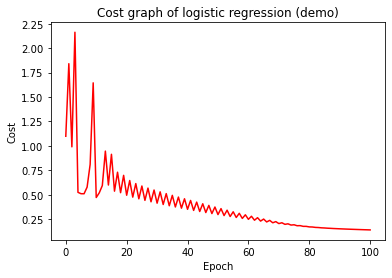

In [35]:
ax = plt.subplot()
plt.plot(torch.tensor(running_loss).detach(), 'r')
ax.set_title('Cost graph of logistic regression (demo)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [36]:
print(model(x_train))

tensor([[0.0262],
        [0.1511],
        [0.2882],
        [0.7922],
        [0.9464],
        [0.9828]], grad_fn=<SigmoidBackward0>)
